# Exercise: Data Splitting


`#scikit-learn` `#data-splitting` `#train-test-split` `#validation-set`


> Objectives:
>
> - Understand the importance of data splitting
> - Use SciKit-Learn to split datasets into training, testing, and validation sets
> - Recognize the importance of stratification for representative splits


## Standard Deep Atlas Exercise Set Up


- [x] Ensure you are using the coursework Pipenv environment and kernel ([instructions](../SETUP.md))
- [x] Apply the standard Deep Atlas environment setup process by running this cell:


In [2]:
import sys, os
sys.path.insert(0, os.path.join('..', 'includes'))

import deep_atlas
from deep_atlas import FILL_THIS_IN
deep_atlas.initialize_environment()
if deep_atlas.environment == 'COLAB':
    %pip install -q python-dotenv==1.0.0

🎉 Running in a Virtual environment


## 🚦 Checkpoint: Start


- [x] Run this cell to record your start time:


In [18]:
deep_atlas.log_start_time()

🚀 Success! Get started...


---


## Context


Properly splitting your dataset is crucial for building a reliable machine learning model. This process allows you to:

- Train your model on one subset of the data.
- Validate its performance on a separate subset.
- Test its generalizability on a third, unseen subset.

The goal is to prevent a bad model fit and to ensure that the model performs well on new, unseen data. It is essential that these splits are representative of the entire dataset, especially when the dataset contains imbalanced classes.

_Stratified_ sampling ensures each split maintains the same class distribution as the whole dataset.

In this exercise, we will:

1. Generate a sample dataset that reflects imbalanced real-world data.
2. Split the data into training, validation, and testing sets both with and without stratification.
3. Visualize the effect of different splitting methods.


## Imports


In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import helpers

## Data Generation


We'll create a synthetic dataset for this exercise. It simulates an imbalanced classification problem with 10 different classes, each having a different number of samples.

- [x] Generate the dataset:


In [3]:
data, labels = helpers.generate_data()

# Print a random sampling of the data (5 items)
for i in range(5):
    index = np.random.randint(0, data.shape[0])
    print(f"Data: {data[index]}")
    print(f"Label: {labels[index]}")
    print()

Data: [ 0.12098114 -0.95664012]
Label: 0

Data: [6.68721865 7.19790177]
Label: 7

Data: [0.1299414  0.39091144]
Label: 0

Data: [3.98022242 4.34075035]
Label: 4

Data: [5.62787806 4.55269635]
Label: 5



- [x] Visualize the class distribution of the entire dataset:


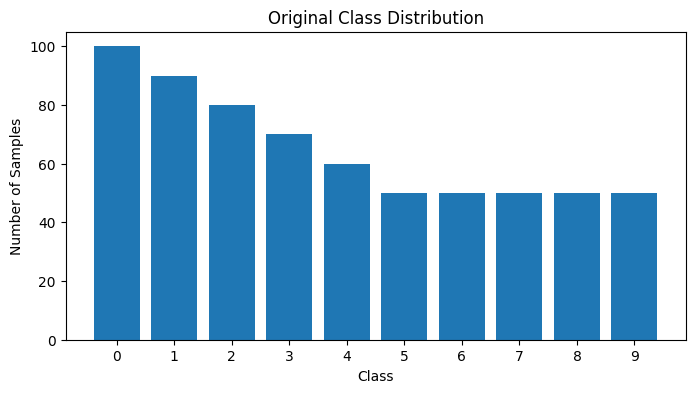

In [4]:
helpers.plot_class_distribution(labels, title="Original Class Distribution")

## Splitting Data


### Without Stratification


First, we'll split the data without using stratification. This method does not preserve the class distribution, which can lead to skewed splits when dealing with imbalanced datasets.

- [x] Split the data into training and testing sets using an 80/20 split, without stratification:
  - Use the `train_test_split` method imported from `sklearn` to produce the following subsets
    - `X` and `y` are common names for the _input features_ and _labels_ of a dataset.
    - The `_ns` postfix indicates "no stratification"
  - `train_test_split` accepts four arguments:
    - The data points (i.e. input features)
    - The corresponding labels
    - The named argument `test_size`, which represents the proportion of data to split into the new set. (e.g. 0.3)
    - A `random_state` argument (an arbitrary integer, e.g. 42).
      - We add this for reproducibility — without it the split will be performed differently every time the cell is executed.


In [7]:
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(data, labels, test_size=0.2, random_state=42)

<details>
<summary>Solution:</summary>

```python
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(
    data, labels, test_size=0.2, random_state=42
)
```

</details>


- [x] Double check the lengths (number of samples) of each set:


In [8]:
print(f"Training set size: {len(X_train_ns)}")
print(f"Testing set size: {len(X_test_ns)}")

Training set size: 520
Testing set size: 130


- [ ] Visualize the distribution of labels across the non-stratified splits:


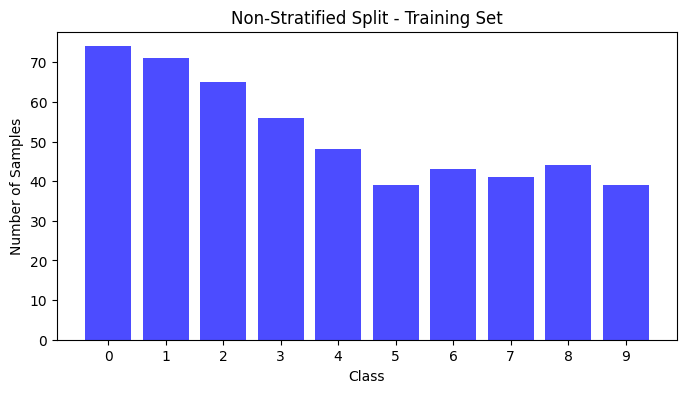

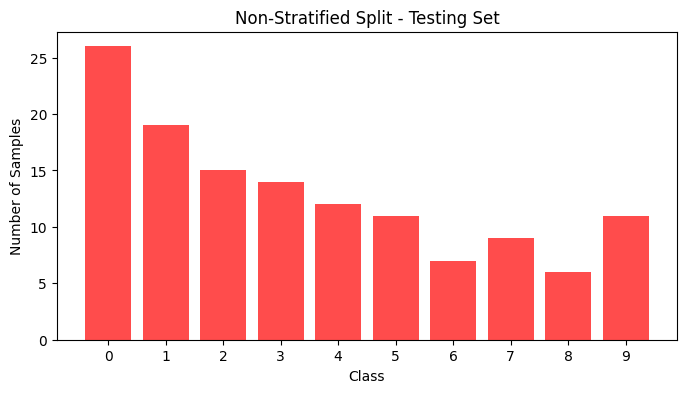

In [9]:
helpers.plot_data_split(
    y_train_ns, None, y_test_ns, title="Non-Stratified Split"
)

### With Stratification


Next, we'll split the data using stratification. This method ensures that the class distribution is preserved in each subset.

- [x] Split the data into training and testing sets using an 80/20 split, with stratification:
  - `train_test_split` accepts another argument `stratify`, which indicates what property of the data we would like to keep constant before and after a split.
    - Add this argument and use the `labels` collection as the argument.


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42, stratify=labels
)
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 520
Testing set size: 130


<details>
<summary>Solution:</summary>

```py
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42, stratify=labels
)
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
```

</details>


- [x] Visualize the distribution of labels across the stratified splits:


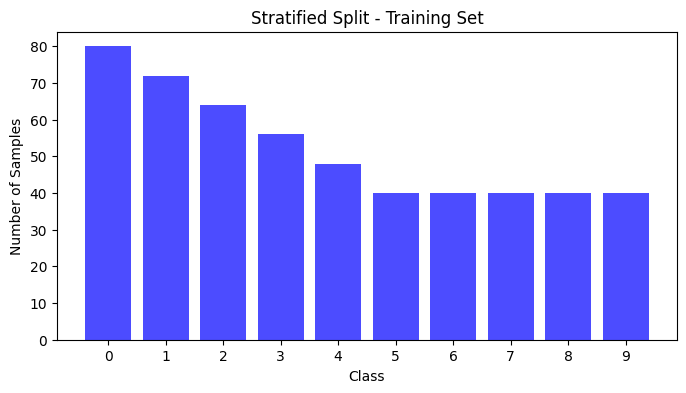

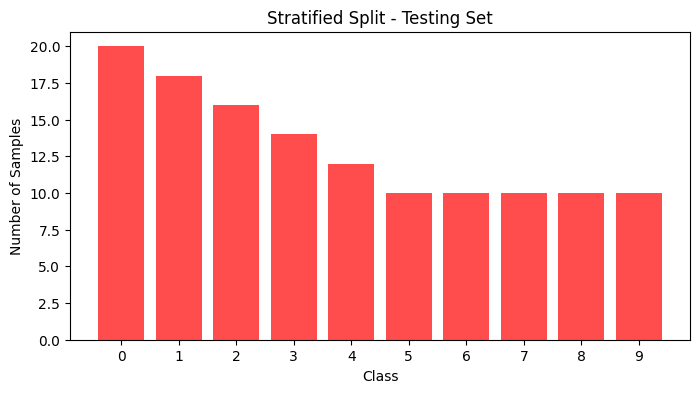

In [13]:
helpers.plot_data_split(y_train, None, y_test, title="Stratified Split")

Note how the distribution charts of the training set and the testing set are the same proportionally — useful when consistency of representation is necessary for valid evaluation.


## Validation Set


While the testing set provides a final assessment of the model’s performance, a validation set is often used during model development to tune hyperparameters and avoid over- or under-fitting.

- [ ] Further split the stratified training set into training and validation sets (e.g., 80/20 split), also using stratification:
  - When completing the cell below, be mindful that we want to split the _training set_, not the all-encompassing _dataset_ that we started off with.


In [16]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train,
)
print(f"Training set size after validation split: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")

Training set size after validation split: 416
Validation set size: 104


<details>
<summary>Solution:</summary>
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)
print(f"Training set size after validation split: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")

</details>


- [x] Visualize the distribution of labels across the final stratified splits:


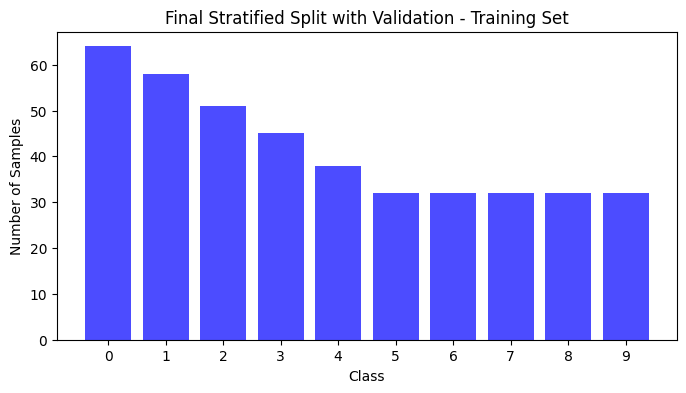

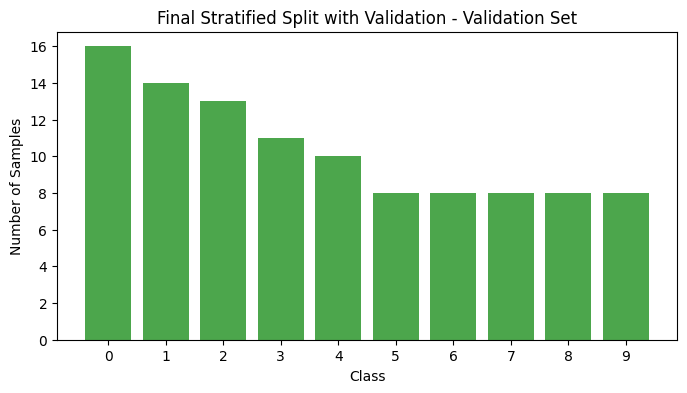

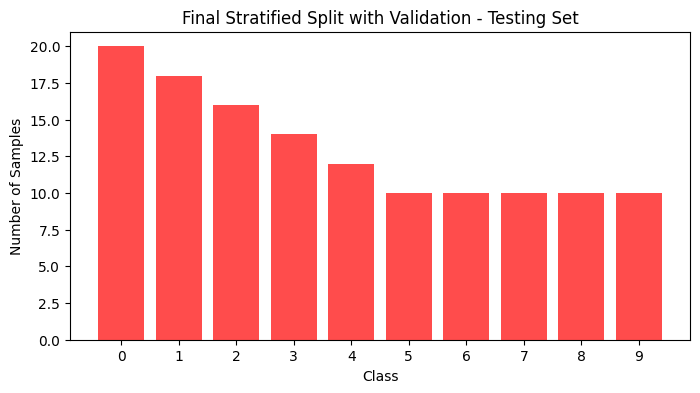

In [17]:
helpers.plot_data_split(
    y_train, y_val, y_test, title="Final Stratified Split with Validation"
)

### 🚦 Checkpoint: Stop


- [x] Uncomment this code
- [x] Complete the feedback form
- [x] Run the cell to log your responses and record your stop time:


```python
# deep_atlas.log_feedback(
#     {
#         # How long were you actively focused on this section? (HH:MM)
#         "active_time": 00:10
#         # Did you feel finished with this section (Yes/No): 
#         "finished": Yes
#         # How much did you enjoy this section? (1–5)
#         "enjoyment": 5
#         # How useful was this section? (1–5)
#         "usefulness": 4,
#         # Did you skip any steps?
#         "skipped_steps": na,
#         # Any obvious opportunities for improvement?
#         "suggestions": na,
#     }
# )
# deep_atlas.log_stop_time()
```


## You did it!


In this exercise, we learned how to properly split a dataset into training, validation, and testing sets, with an emphasis on maintaining a representative distribution of classes using stratification. This is a critical step in building robust machine learning models, ensuring that your model's performance metrics reflect real-world scenarios.

Understanding how to split data and why it's important will prepare you for more complex modeling tasks.